In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
%matplotlib inline

In [4]:
train = pd.read_csv('../../toxic/data/train.csv')

In [5]:
test = pd.read_csv('../../toxic/data/test.csv')

In [11]:
subm = pd.read_csv('../../toxic/data/sample_submission.csv')

In [6]:
train.shape

(159571, 8)

In [7]:
test.shape

(153164, 2)

In [8]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [9]:
test.head(2)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


In [12]:
subm.head(2)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5


In [13]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048923, 5000)

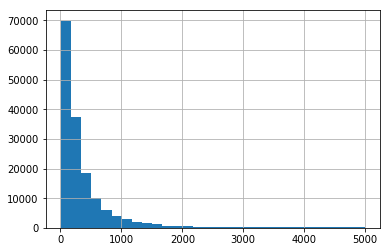

In [17]:
lens.hist(bins=30)

In [18]:
type(lens)

pandas.core.series.Series

In [25]:
lens.quantile(0.05), lens.quantile(0.95)

(33.0, 1355.0)

In [32]:
lens1 = lens[(lens > lens.quantile(0.05)) & (lens < lens.quantile(0.95))]

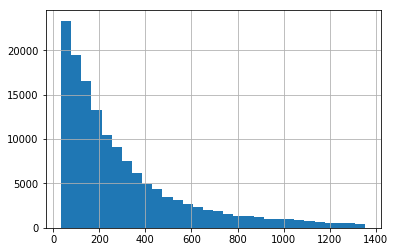

In [34]:
lens1.hist(bins=30)

In [35]:
lens2 = lens1.apply(lambda x: np.log1p(x))

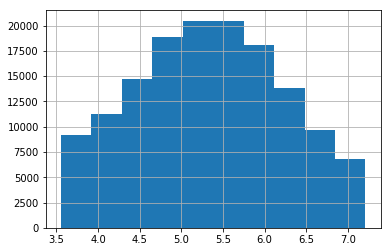

In [36]:
lens2.hist()

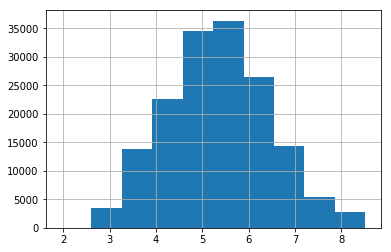

In [37]:
lens3 = lens.apply(lambda x: np.log1p(x))
lens3.hist()
# this graph looks fine, meaning no percentige need to be applied first. (meaning there is no huge outliers?)

In [42]:
label_cols = list(train.columns[-6:])
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [60]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [61]:
train.comment_text.isnull().sum()

0

In [65]:
len(train) - train.comment_text.count()

0

In [66]:
test.comment_text.isnull().sum()

0

In [67]:
len(test) - test.comment_text.count()

0

In [57]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
train_p = train.head(10).copy()

In [68]:
import string

In [69]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
[{string.punctuation}]

[{'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'}]

In [71]:
[{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’]

SyntaxError: invalid character in identifier (<ipython-input-71-e6321aab130f>, line 1)

In [72]:
import re

In [73]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

In [75]:
'[{}]'.format(string.punctuation)

'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [99]:
def if_spe_exist(spe, string):
    for item in spe:
        if item in string:
            return item
    return np.nan

In [118]:
(train.comment_text.apply(lambda x: if_spe_exist(list(string.punctuation), x))).count()

155106

In [119]:
(train.comment_text.apply(lambda x: if_spe_exist(list(string.punctuation) + list('“”¨«»®´·º½¾¿¡§£₤‘’'), x))).count()

155117

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
special_punc = '“”¨«»®´·º½¾¿¡§£₤‘’'

In [126]:
train_p.comment_text = train_p.comment_text.str.replace('[{}]'.format(special_punc+string.punctuation),'')

In [127]:
(train_p.comment_text.apply(lambda x: if_spe_exist(list(string.punctuation) + list('“”¨«»®´·º½¾¿¡§£₤‘’'), x))).count()

0

# replace punctuations

In [129]:
train.comment_text = train.comment_text.str.replace('[{}]'.format(special_punc+string.punctuation),'')

In [130]:
test.comment_text = test.comment_text.str.replace('[{}]'.format(special_punc+string.punctuation),'')

In [131]:
train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [132]:
train.comment_text[0]

'Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted They werent vandalisms just closure on some GAs after I voted at New York Dolls FAC And please dont remove the template from the talk page since Im retired now892053827'

In [133]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9, strip_accents='unicode', sublinear_tf=True)

In [135]:
train.comment_text.fillna('unknown', inplace=True)

In [136]:
train_term_doc = vec.fit_transform(train.comment_text)

In [137]:
test.comment_text.fillna('unknown', inplace=True)

In [138]:
test_term_doc = vec.transform(test.comment_text)

In [139]:
train_term_doc, test_term_doc

(<159571x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 75 stored elements in Compressed Sparse Row format>,
 <153164x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 790966 stored elements in Compressed Sparse Row format>)